In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from tqdm import tqdm

from src.graphs import SuissRollGraph
from src.mining import compute_communities, compute_linkage

In [2]:
font = {'size' : 15}
matplotlib.rc('font', **font)

### Create a Suiss Roll graph

In [3]:
graph = SuissRollGraph(n=500, n_clusters=4, sigma=1)

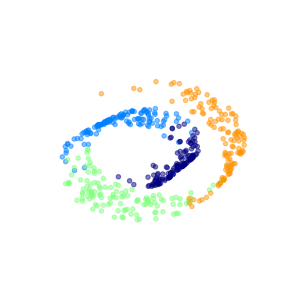

In [4]:
graph.plot()
plt.savefig('plots/suiss_roll_ground_truth.pdf', format='pdf', transparent=True)
plt.show()

### Compute graph dendrogram

In [5]:
scales, scale2linkage = compute_linkage(
    graph=graph,
    scales_num=10,
    r_num=10)

100%|██████████| 10/10 [00:00<00:00, 81.09it/s]


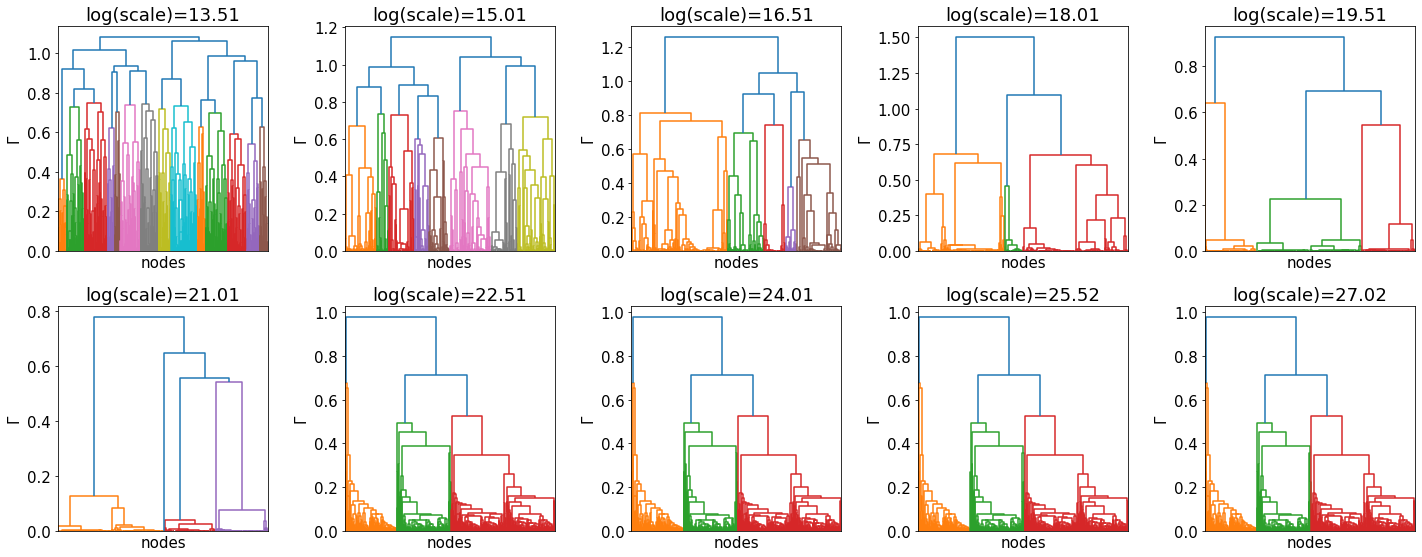

In [6]:
nrows = 2
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 8))

for s, linkage in tqdm(enumerate(scale2linkage), total=len(scale2linkage)):
    i = s // ncols
    j = s % ncols
    ax = axes[i][j]
    _ = dendrogram(linkage, no_labels=True, ax=ax)
    ax.set_title('log(scale)={:.2f}'.format(np.log(scales[s])))
    ax.set_xlabel('nodes')
    ax.set_ylabel(r'$\Gamma$')

plt.tight_layout()
plt.savefig('plots/suiss_roll_dendrograms.pdf', format='pdf', transparent=True)
plt.show()

### Compute multiscale communities

In [7]:
communities = compute_communities(scale2linkage)

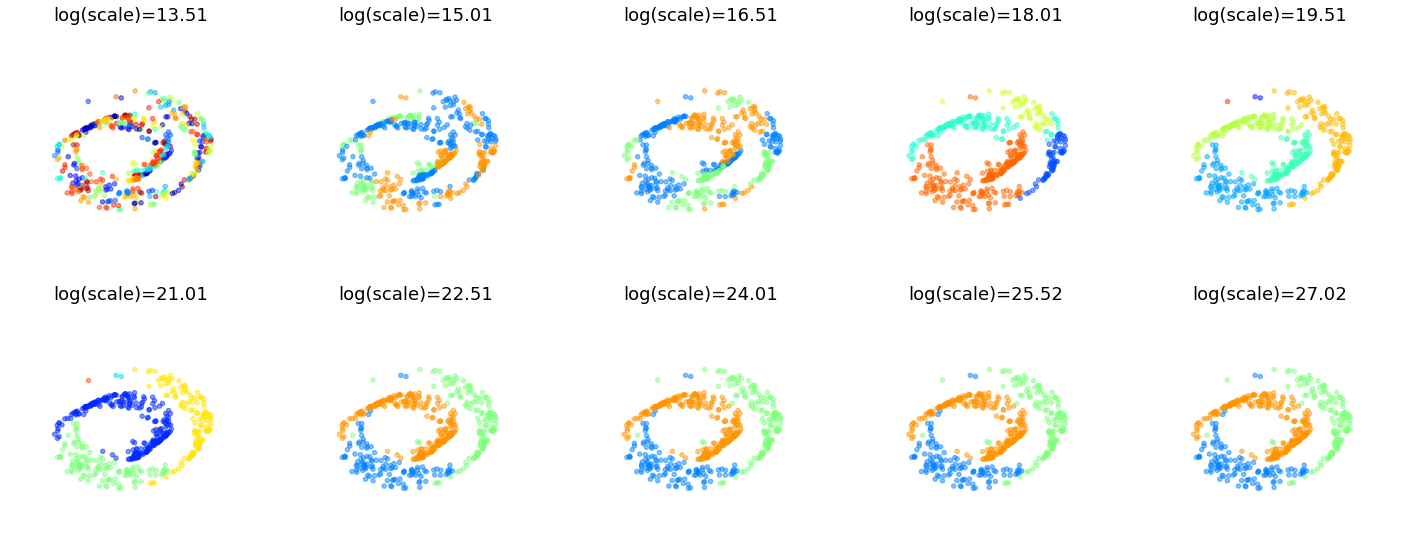

In [8]:
nrows = 2
ncols = 5

fig = plt.figure(figsize=(20, 8))
for k, s in enumerate(scales):
    i = k // ncols
    j = k % ncols
    ax = fig.add_subplot(nrows, ncols, k+1, projection='3d')
    graph.plot(communities=communities[:, k], ax=ax)
    ax.set_title('log(scale)={:.2f}'.format(np.log(scales[k])))

plt.tight_layout()
plt.savefig('plots/suiss_roll_multiscale.pdf', format='pdf', transparent=True)
plt.show()